### Boosting, AdaBoost,GBM, XGB

In [14]:
from PIL import Image
img = Image.open('boosting.jpg')
img1 = Image.open('adaboost.jpg')
img2 = Image.open('input.jpg')
img3 = Image.open('gb1.jpg')
img4 = Image.open('gb2.jpg')
img5 = Image.open('gb3.jpg')


### Tree-based ensemble algorithms
**Ensemble algorithms and particularly those that utilize decision trees as weak learners have multiple advantages compared to other algorithms:**

>Their algorithms are easy to understand and visualize: describing and sketching a decision tree is arguably easier than describing Support Vector Machines

>They are non-parametric and don’t assume or require the data to follow a particular distribution: this will save you time transforming data to be normally distributed
>
>They can handle mixed data types: categorical variables do not necessarily have to be one hot encoded
>
>Multi-collinearity of features does not affect the accuracy and prediction performance of the model: features do not need to be removed or otherwise engineered to decrease the correlations and interactions between them
>
>They are robust against overfitting: because they use many weak learners that underfit (high bias) and combine those predictions into a stronger learner, they reduce the overfitting (variance) of the model
>
>They are relatively robust against outliers and noise: in general, they will handle noisy data (e.g. features with no effect on the target) or outliers (e.g. extreme values) well with little effect on the overall performance 
>
>Inputs do not need to be scaled: preprocessing and transforming the features with MinMaxScaler or StandardScaler are not necessary
>
>They are computationally relatively inexpensive: compared to algorithms such as Support Vector Machines or neural networks they are faster
>
>They usually perform much better than their weak learners: decision trees will be less accurate due to their high variance/overfitting compared with boosting and bagging algorithms

## Boosting
*The general idea of Boosting just as well any other ensemble algorithm is to combine several weak learners into a stronger one.
A weak learner refers to a learning algorithm that only predicts slightly better than randomly. The baseline of Boosting algorithms is to try predictors sequentially, where each subsequent model attempts to fix the errors of its predecessor.*

***That means:***

>The trees are grown sequentially
>
>Each tree is grown using information from previously grown trees
>
>It does not involve bootstrap sampling as in bagging
>
>Family of weak learners should have a minimum correlation between them


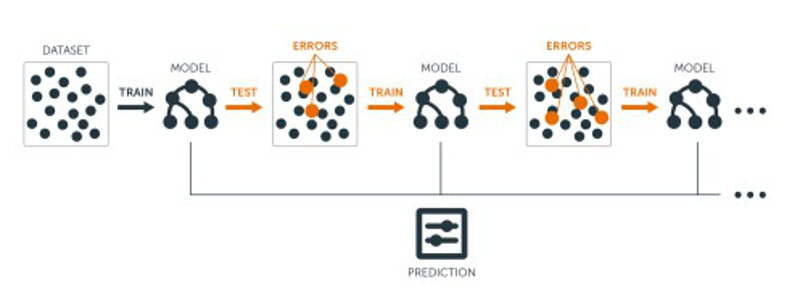

In [16]:
img.resize((800,300))

### Few important aspects regarding Boosting

>**The number of trees B -** Unlike bagging and random forests, boosting can overfit if B is too large, although this overfitting tends to occur slowly if at all. We use cross-validation to select B.

>**The number d of splits in each tree -** It controls the complexity of the boosted ensemble. Often d = 1 works well, in which case each tree is a stump, consisting of a single split. In boosting, because the growth of a particular tree takes into account the other trees that have already been grown, smaller trees are typically sufficient.

### Types of Boosting Algorithms

*The two main boosting algorithms are Adaptive Boosting and Gradient Boosting. XGBoot, LightGBM and CatBoost are basically different implementations of Gradient Boosting.*


## Adaptive Boosting
Adaptive Boosting, or most commonly known AdaBoost, algorithm was first introduced by Freund & Schapire in 1995. It is sequentially growing decision trees as weak learners and punishing the incorrectly predicted samples by assigning a larger weight to them after each round of prediction. This way, the algorithm is learning from previous mistakes. The final prediction is the weighted majority vote (or weighted median in case of regression problems)

>After training a classifier at any level, ada-boost assigns weight to each training item. Misclassified item is assigned higher weight so that it appears in the training subset of next classifier with higher probability.

>After each classifier is trained, the weight is assigned to the classifier as well based on accuracy. More accurate classifier is assigned higher weight so that it will have more impact in final outcome.

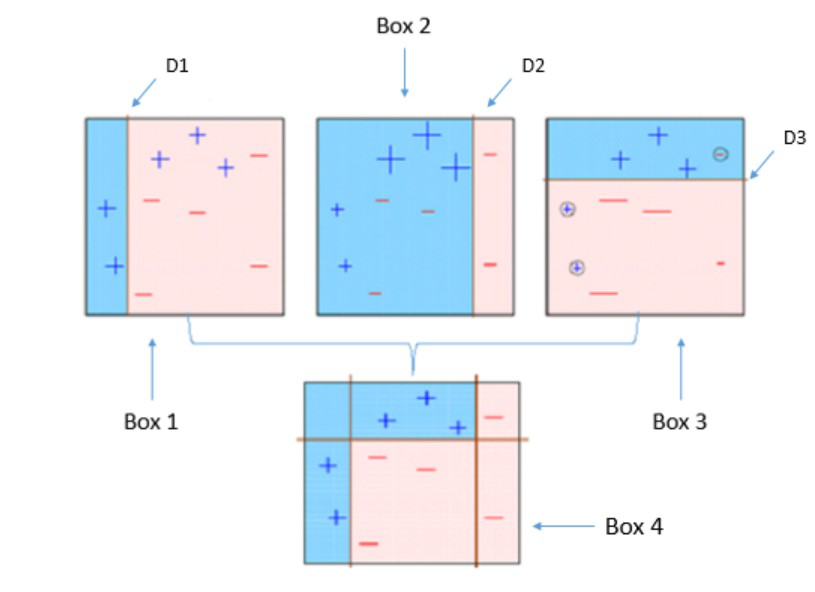

In [17]:
img1

### Algorithm steps

Initialize the weights of samples for the first round as w = 1/m, where m is the number of samples)

**For t in T rounds:**

>**Step 1.)** Grow a weak learner (decision tree stump) using the distribution p that does the best job classifying the collection of samples; return hypothesis h with prediction values for each example in the data

>**Step 2.)** Calculate Total Error and Amount of say (classifier weights)

>**Step 3.)** Calculate Beta

>**Step 4.)** Update the weight vector of the samples to w = w*Beta so that predictions with poor performance will have higher a weight and predictions with better performance will have a lower weight

>**Step 5.)** Calculate distribution p by normalizing the weight vector w 


For 8 Samples, initial weight for each sample will be 1/8 = 0.125

#### Step 1.) 
Weak Learner -- Decision tree stump is build with the feature for which Gini index is the lowest

>Calculate the **Gini score** for sub-nodes, using formula sum of squares of probability for success(i.e. “Correct”) and failure(i.e. “Incorrect”) **(p² +q²)**

>Calculate the **Gini Index** for a split, using **(1- weighted Gini score of each node of that split)**.

8 Samples:
Feature 1 - left node - 3 correct, 2 incorrect, right node - 2 correct, 1 incorrect

Feature 2 - left node - 3 correct, 0 incorrect, right node - 4 correct, 1 incorrect


Gini for left node = ((3/5)*(3/5))+((2/5)*(2/5))=0.52. 
Gini for right node = ((2/3)*(2/3))+((1/3)*(1/3)) = 0.556
Weighted Gini Index for feature 1 =1- ((5/8)*0.52+(3/8)*0.556) = 0.47

Weighted Gini Index for feature 2 = 0.2

So stump will be made with feature 2


#### Step 2

##### Total Error
The Total Error for a stump is the **sum of the weights associated with the incorrectly classified samples.**

8 Samples: left node - 3 correct, 0 incorrect, right node - 4 correct, 1 incorrect

Total Error for stump with feature 2 :- It made 1 errors i.e 1/8.

Note:- Because all the sample's weight is added up to 1, Total Error will always be between 0 and 1. **0 indicates perfect stump, 1 indicates horrible stump.**


##### Amount of Say

**1/2 * ln((1- total error)/total error)**

With learning rate introduced, Amount of say will be -> learning_rate multiply ( 1/2 * ln((1- total error)/total error))


Amount of say for stump with feature 2 is  [1/2 ln(7)] = 0.97.



#### Step 3

##### Calculate Beta

For **incorrectly** classified samples -> Beta = **exp(Amount of say)**

For **correctly** classified samples -> Beta = **exp(-Amount of say)**

#### Step 4

##### Updating Weights

New Sample Weight  = **Sample Weight * Beta**


There is one misclassified sample, Here sample weight of that sample is 0.125 and the amount of say is 0.97.
New Sample Weight = 0.125 * e^0.97 = 0.125 (2.67) = 0.33

There are seven correctly classified samples, Here sample weight of that samples is 1/8 and the amount of say is 0.97
New Sample Weight = 0.125 * e^-0.97 = 0.125(0.38) = 0.05 for all the 7 samples 


#### Step 5

##### Normalizing weights and Creating new distribution


If we add up the New Sample Weights, **0.33 + 7*(0.5)= 0.68.** So we divide each sample weight with 0.68 to get the normalized values. Now we consider Normalized Weights as New Sample Weights 

New weights will be -- 0.07, 0.07, 0.07, **0.49**, 0.07, 0.07, 0.07, 0.07

Before building the next stump, we need to create a new dataset. Here we pick random numbers between 0 and 1 and select the samples for next iteration, here we use sample weights like a distribution.

#### Output 

Imagine there are 4 stumps are created by the AdaBoost algorithm. Out of 4 stumps, 2 stumps are classified as category 1, and the other 2 stumps classified as category 2.

These are the Amount of Say for these stumps are 0.97+0.32 = 1.29, and the Amount of Say of the other 2 stumps are 0.41+0.82=1.23.

Ultimately, category 1 will be the output because of the larger Amount of Say(1.29).

### Pros:

>Relatively robust to overfitting in low noise datasets

>AdaBoost has only a few hyperparameters that need to be tuned to improve model performance

>easy to understand and to visualize

### Cons:

>The drawback of AdaBoost is that it is easily defeated by noisy data, the efficiency of the algorithm is highly affected by outliers as the algorithm tries to fit every point perfectly. 

>Compared to random forests and XGBoost, AdaBoost performs worse when irrelevant features are included

>AdaBoost is not optimized for speed


In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9210526315789473


In [2]:
abc.feature_importances_

array([0.  , 0.  , 0.46, 0.54])

#### Using Different Base Learners

In [3]:
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


#### Hyperparameters
**base_estimators:** specifies the base type estimator, i.e. the algorithm to be used as base learner. default = DecisionTreeClassifier(max_depth=1).

**n_estimators:** The maximum number of estimators at which boosting is terminated. default = 50

**learning_rate:** Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators. default=1.

**random_state:** makes the model’s output replicable. default=None

**loss:** It is only for regressor.The loss function to use when updating the weights after each boosting iteration. {‘linear’, ‘square’, ‘exponential’}, default=’linear’


## Gradient Boosting

As the name suggests, Gradient Boosting means Gradient Descent + Boosting.

This is another very popular Boosting algorithm whose work basis is just like what we’ve seen for AdaBoost.The difference lies in what it does with the underfitted values of its predecessor. Contrary to AdaBoost, which tweaks the instance weights at every interaction, this method tries to **fit the new predictor to the residual errors made by the previous predictor**.

Gradient boosting re-defines boosting as a numerical optimization problem where the objective is to **minimize the loss function** of the model by adding weak learners using a **gradient-descent like procedure**. 

As gradient boosting is based on minimizing a loss function, different types of loss functions can be used resulting in a flexible technique that can be applied to **regression, multi-class classification, etc.**



#### Cost optimization
This algorithm optimize a cost function over function space by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction.

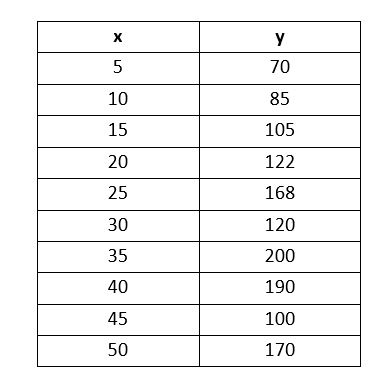

In [19]:
### Input data

img2

#### Step 1. 

F0(x) (initial estimator) gives the predictions from the first stage of our model with x as input and y as output.
Calculate the residuals i.e. error (y-F0(x)).


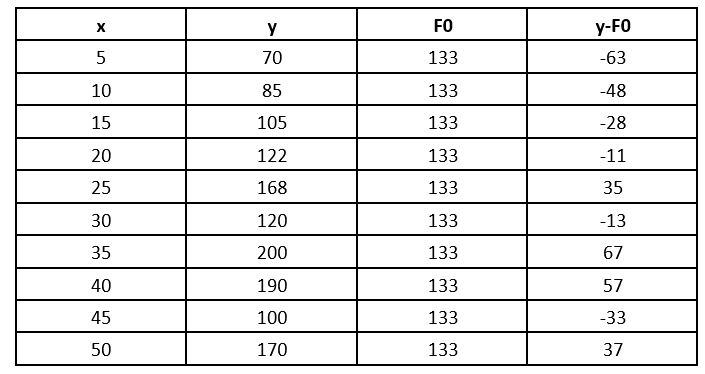

In [20]:
img3

#### Step 2. 
We can use the residuals from F0(x) to create h1(x). h1(x) will be a regression tree which will try and reduce the residuals from the previous step. The output of h1(x) won’t be a prediction of y; instead, it will help in predicting the successive function F1(x) which will bring down the residuals.

The additive model h1(x) computes the mean of the residuals (y – F0) at each leaf of the tree. The boosted function F1(x) is obtained by summing F0(x) and h1(x). This way h1(x) learns from the residuals of F0(x) and suppresses it in F1(x).

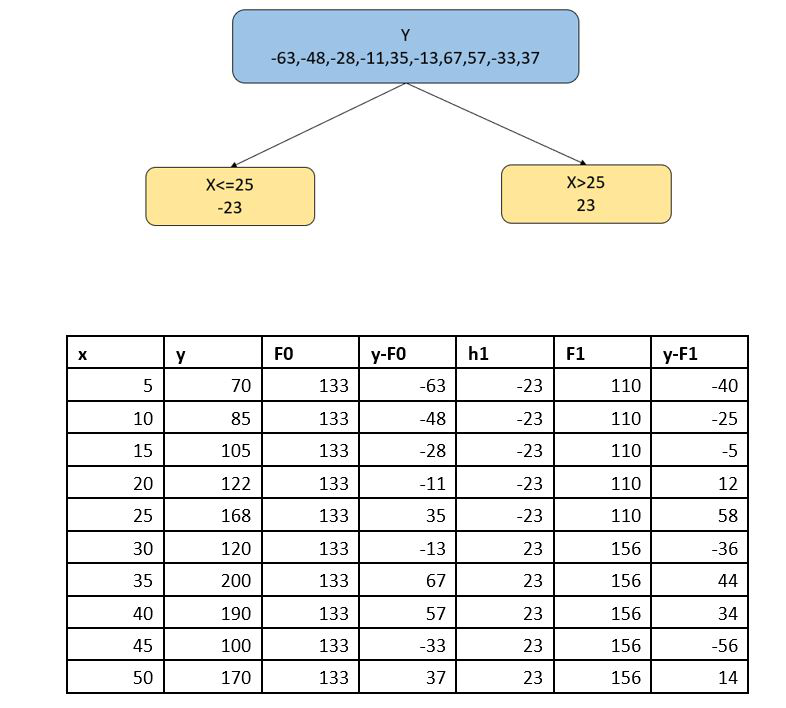

In [21]:
img4

#### Step 3.
Residuals from the boosted output i.e (y-F1(x)) will be used to create next tree h2(x) and the boosted output will be F2(x) obtained by summing F1(x) and h2(x).

**This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.**


In [ ]:
img5


Hence the residuals for a given model are the negative gradients of the mean squared error (MSE) loss function and the process is similar to the process of the gradient descent algorithm.

**Gradient boosting does not modify the sample distribution as weak learners train on the remaining residual errors of a strong learner (i.e, pseudo-residuals).**


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9210526315789473


In [10]:
# sub_tree_42 = clf.estimators_[42, 0]

# # Visualization. Install graphviz in your system
# from pydotplus import graph_from_dot_data
# from IPython.display import Image
# dot_data = export_graphviz(
#     sub_tree_42,
#     out_file=None, filled=True, rounded=True,
#     special_characters=True,
#     proportion=False, impurity=False, # enable them if you want
# )
# graph = graph_from_dot_data(dot_data)
# Image(graph.create_png())

#### Hyperparameters
**loss:** {‘deviance’, ‘exponential’}, default=’deviance’
loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.

**learning_rate:**  float, default=0.1
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

**n_estimators:** int, default=100
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

**subsample:** float, default=1.0
The fraction of samples to be used for fitting the individual base learners. 

**criterion:** {‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’
The function to measure the quality of a split. 

**min_samples_split:** int or float, default=2
The minimum number of samples required to split an internal node.

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

**min_samples_leaf:** int or float, default=1
The minimum number of samples required to be at a leaf node.

**max_depth:** int, default=3
maximum depth of the individual regression estimators. 

**min_impurity_decrease:** float, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.


**init:** estimator or ‘zero’, default=None
An estimator object that is used to compute the initial predictions. init has to provide fit and predict_proba. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.

**max_features:** {‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.

If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

If ‘auto’, then max_features=sqrt(n_features).

If ‘sqrt’, then max_features=sqrt(n_features).

If ‘log2’, then max_features=log2(n_features).

If None, then max_features=n_features.


**Choosing max_features < n_features leads to a reduction of variance and an increase in bias.**


### XGBoost
Extreme Gradient Boosting is an advanced implementation of the Gradient Boosting. This algorithm is designed to “push the extreme of the computation limits of machines to provide a scalable , portable and accurate library.”. Moreover, It includes a variety of regularisation which reduces overfitting and improves overall performance.

#### Parallel Processing
Xgboost doesn't run multiple trees in parallel like you noted, you need predictions after each tree to update gradients.

The parallelisation happens during the construction of each trees, at a very low level. Each independent branches of the tree are trained separately.

#### Finding Best Split

The key challenge in training a GBDT is the process of finding the best split for each leaf. When naively done, this step requires the algorithm to go through every feature of every data point. The computational complexity is thus O(n{data}n{features}).

**Histogram-based methods**
Often, small changes in the split don't make much of a difference in the performance of the tree. Histogram-based methods take advantage of this fact by grouping features into a set of bins and perform splitting on the bins instead of the features. This is equivalent to subsampling the number of splits that the model evaluates. Since the features can be binned before building each tree, this method can greatly speed up training, reducing the computational complexity to O(n{data}n{bins}).

### Advantages
>Regularized Gradient Boosting with both L1 and L2 regularization.

>Implements parallel processing being much faster than GB.

>Allows users to define custom optimisation objectives and evaluation criteria adding a whole new dimension to the model.

>XGBoost has an in-built routine to handle missing values.

>XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.

>XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.

#### Cons
>XGBoost is more difficult to understand, visualize and to tune compared to AdaBoost and random forests. There is a multitude of hyperparameters that can be tuned to increase performance.

>XGBoost cannot handle categorical features by itself, it only accepts numerical values similar to Random Forest. Therefore one has to perform various encodings like label encoding, mean encoding or one-hot encoding before supplying categorical data to XGBoost.

In [5]:
# XGBoost 
from xgboost import XGBClassifier
clf = XGBClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9210526315789473


In [6]:
# from xgboost import plot_tree
# import matplotlib.pyplot as plt

# # plot single tree
# plot_tree(clf)
# plt.show()

# fig, ax = plt.subplots(figsize=(30, 30))
# xgb.plot_tree(model, num_trees=4, ax=ax)
# plt.show()

### Hyperparameters

**eta:** [default=0.3, alias: learning_rate], range: [0,1]

**gamma:** [default=0, alias: min_split_loss], range: [0,∞]

Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

**max_depth:** [default=6], range: [0,∞]

Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. Beware that XGBoost aggressively consumes memory when training a deep tree.

**min_child_weight:** [default=1], range: [0,∞]

Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. 

**subsample:** [default=1], range: (0,1]

Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.


**colsample_bytree, colsample_bylevel, colsample_bynode:** [default=1], range of (0, 1]

This is a family of parameters for subsampling of columns.

>**colsample_bytree** is the subsample ratio of columns when constructing **each tree**. Subsampling occurs once for every tree constructed.

>**colsample_bylevel** is the subsample ratio of columns for each level. Subsampling occurs once for **every new depth level** reached in a tree. Columns are subsampled from the set of columns chosen for the current tree.

>**colsample_bynode** is the subsample ratio of columns for **each node (split)**. Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level.

*colsample_by parameters work cumulatively. For instance, the combination {'colsample_bytree':0.5, 'colsample_bylevel':0.5, 'colsample_bynode':0.5} with 64 features will leave 8 features to choose from at each split.*


**lambda:** [default=1, alias: reg_lambda]

L2 regularization term on weights. Increasing this value will make model more conservative.

**alpha:** [default=0, alias: reg_alpha]

L1 regularization term on weights. Increasing this value will make model more conservative.

**tree_method:** string [default= auto]

The tree construction algorithm used in XGBoost. 

>**auto:** Use heuristic to choose the fastest method.

>**exact:** Exact greedy algorithm. Enumerates all split candidates. For small dataset, exact greedy (exact) will be used.

>**approx:** Approximate greedy algorithm using quantile sketch and gradient histogram.

>**hist:** Faster histogram optimized approximate greedy algorithm.

>**gpu_hist:** GPU implementation of hist algorithm.

For larger dataset, approximate algorithm (approx) will be chosen. It’s recommended to try hist and gpu_hist for higher performance with large dataset. (gpu_hist)has support for external memory.


**scale_pos_weight:** [default=1]

Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances). 

**max_bin:** [default=256]

Maximum number of discrete bins to bucket continuous features.Only used if tree_method is set to hist.

Increasing this number improves the optimality of splits at the cost of higher computation time.



**predictor:** [default=``auto``]

The type of predictor algorithm to use. Provides the same results but allows the use of GPU or CPU.

auto: Configure predictor based on heuristics.

cpu_predictor: Multicore CPU prediction algorithm.

gpu_predictor: Prediction using GPU. Used when tree_method is gpu_hist. When predictor is set to default value auto, the gpu_hist tree method is able to provide GPU based prediction without copying training data to GPU memory. If gpu_predictor is explicitly specified, then all data is copied into GPU, only recommended for performing prediction tasks.




### Light GBM

>Uses a novel technique of Gradient-based One-Side Sampling (GOSS) to filter out the data instances for finding a split value

>Can also handle categorical features by taking the input of feature names. 

>It does not convert to one-hot coding, and is much faster than one-hot coding (One hot encoding has issues of sparsity and curse of dimensionality). 

### Cat Boost

>No need to externally encode categorical variables.

>Use one-hot encoding for all features with number of different values less than or equal to the  one_hot_max_size (parameter) value

>If nothing is passed in cat_features argument, CatBoost will treat all the columns as numerical variables.

>Catboost deals with categorical features by, “generating random permutations of the dataset and for each sample computing the average label value for the sample with the same category value placed before the given one in the permutation”. 

>They also process the data with GPU acceleration, and do feature discretization into a fixed number of bins (128 and 32).


### XGB params

https://xgboost.readthedocs.io/en/latest/parameter.html